# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
df = pd.read_csv('Actual North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011)-2.txt',delimiter='\t',skipfooter=14,engine='python')

In [3]:
df


,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,29.03
1,NaN,"Jan 02, 1979",1979/01/02,31.35
2,NaN,"Jan 03, 1979",1979/01/03,41.66
3,NaN,"Jan 04, 1979",1979/01/04,47.30
4,NaN,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...,...
12049,NaN,"Dec 28, 2011",2011/12/28,59.91
12050,NaN,"Dec 29, 2011",2011/12/29,66.64
12051,NaN,"Dec 30, 2011",2011/12/30,68.61
12052,NaN,"Dec 31, 2011",2011/12/31,73.49


### Clean the data


>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [4]:
df = df[df.Notes != "Total"]
#view resulting DataFrame
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,29.03
1,NaN,"Jan 02, 1979",1979/01/02,31.35
2,NaN,"Jan 03, 1979",1979/01/03,41.66
3,NaN,"Jan 04, 1979",1979/01/04,47.30
4,NaN,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,56.67
12049,NaN,"Dec 28, 2011",2011/12/28,59.91
12050,NaN,"Dec 29, 2011",2011/12/29,66.64
12051,NaN,"Dec 30, 2011",2011/12/30,68.61


In [5]:
df.drop(['Notes'], axis = 1)

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,"Jan 01, 1979",1979/01/01,29.03
1,"Jan 02, 1979",1979/01/02,31.35
2,"Jan 03, 1979",1979/01/03,41.66
3,"Jan 04, 1979",1979/01/04,47.30
4,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67
12049,"Dec 28, 2011",2011/12/28,59.91
12050,"Dec 29, 2011",2011/12/29,66.64
12051,"Dec 30, 2011",2011/12/30,68.61


>3) Make a column called Date that is in the pandas datetime format

In [6]:
df['Date']= pd.to_datetime(df['Month Day, Year'], errors = 'raise')
df

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date
0,NaN,"Jan 01, 1979",1979/01/01,29.03,1979-01-01
1,NaN,"Jan 02, 1979",1979/01/02,31.35,1979-01-02
2,NaN,"Jan 03, 1979",1979/01/03,41.66,1979-01-03
3,NaN,"Jan 04, 1979",1979/01/04,47.30,1979-01-04
4,NaN,"Jan 05, 1979",1979/01/05,46.89,1979-01-05
...,...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,56.67,2011-12-27
12049,NaN,"Dec 28, 2011",2011/12/28,59.91,2011-12-28
12050,NaN,"Dec 29, 2011",2011/12/29,66.64,2011-12-29
12051,NaN,"Dec 30, 2011",2011/12/30,68.61,2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [7]:
df['Year'] = df['Date'].map(lambda x: x.year)
df['Month'] = df['Date'].map(lambda x: x.month)
df['Day'] = df['Date'].map(lambda x: x.day)
df

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day
0,NaN,"Jan 01, 1979",1979/01/01,29.03,1979-01-01,1979,1,1
1,NaN,"Jan 02, 1979",1979/01/02,31.35,1979-01-02,1979,1,2
2,NaN,"Jan 03, 1979",1979/01/03,41.66,1979-01-03,1979,1,3
3,NaN,"Jan 04, 1979",1979/01/04,47.30,1979-01-04,1979,1,4
4,NaN,"Jan 05, 1979",1979/01/05,46.89,1979-01-05,1979,1,5
...,...,...,...,...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,56.67,2011-12-27,2011,12,27
12049,NaN,"Dec 28, 2011",2011/12/28,59.91,2011-12-28,2011,12,28
12050,NaN,"Dec 29, 2011",2011/12/29,66.64,2011-12-29,2011,12,29
12051,NaN,"Dec 30, 2011",2011/12/30,68.61,2011-12-30,2011,12,30


In [8]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

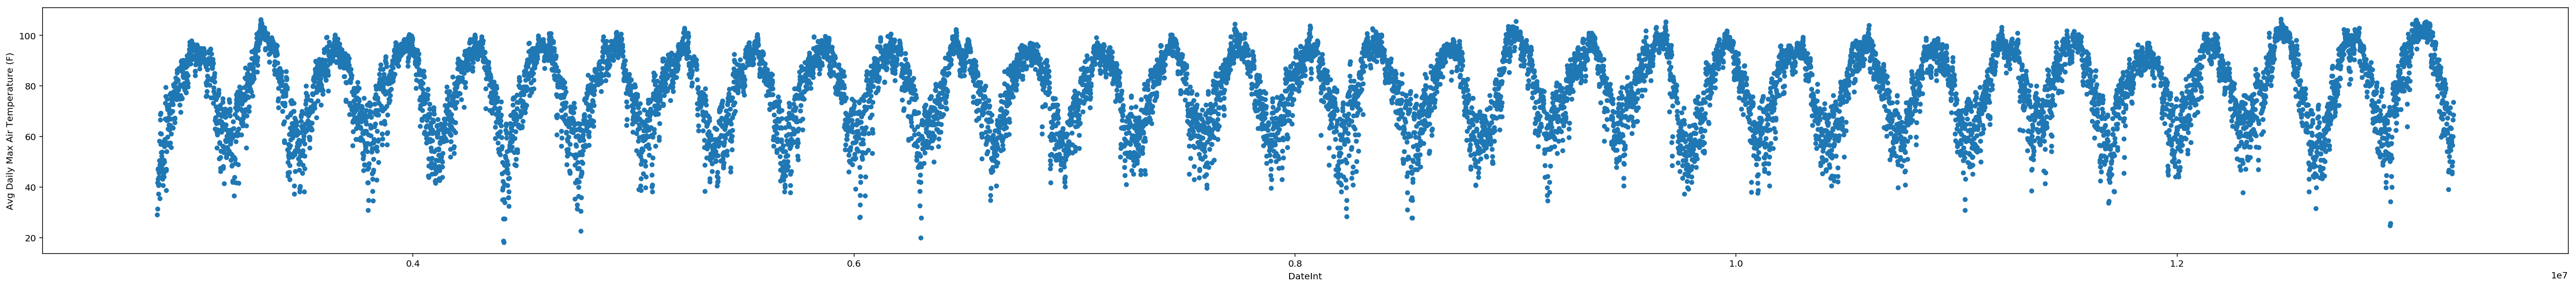

In [9]:
df.plot.scatter('DateInt', 'Avg Daily Max Air Temperature (F)', figsize=(50, 5));

>5) Describe your plot. Neither positive or negative, non linear

### Adding colors for our graph

In [10]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

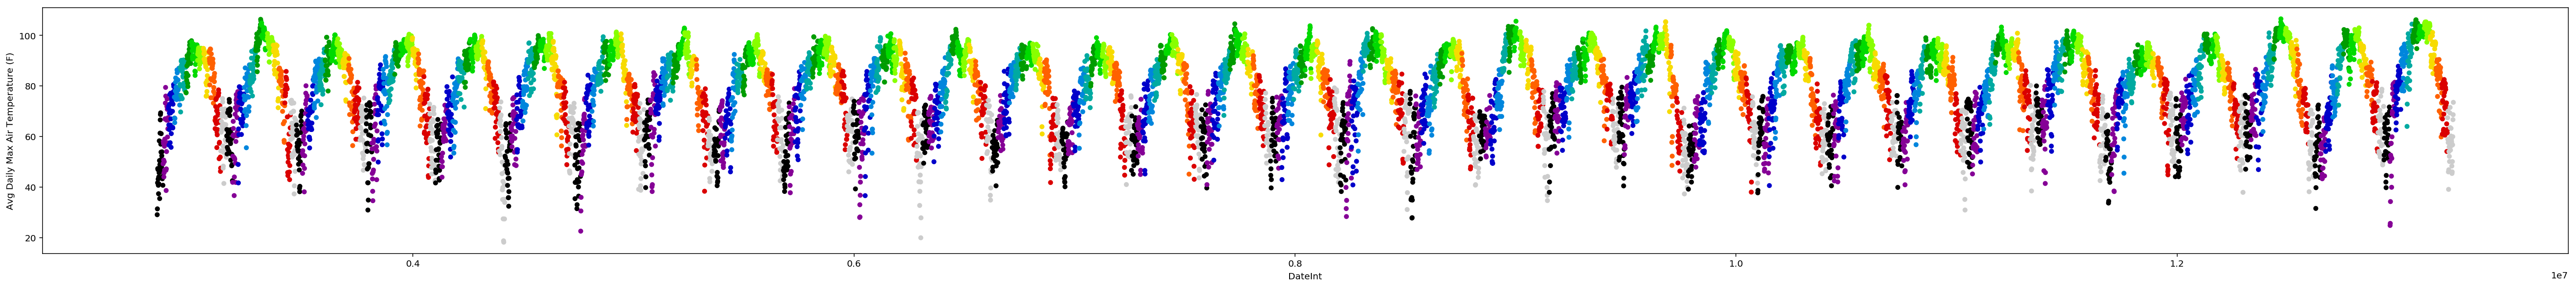

In [11]:
df.plot.scatter('DateInt', 'Avg Daily Max Air Temperature (F)', figsize=(50, 5), c=df['color']);

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [12]:
subset = df[df['Date']<pd.datetime(1979, 6, 1)]

>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

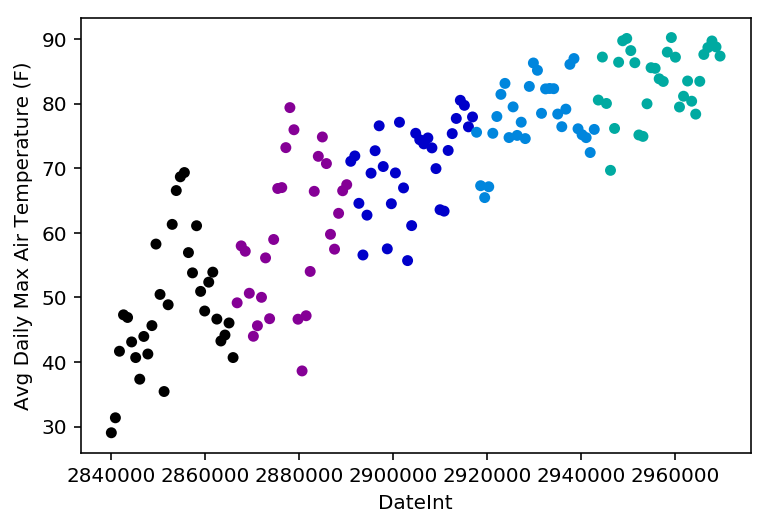

In [13]:
subset.plot.scatter('DateInt', 'Avg Daily Max Air Temperature (F)', c=df['color']);

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [14]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [16]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [17]:
Y_pred = lin_reg(X,Y)

0.00034443088958599586 -932.4267269431856


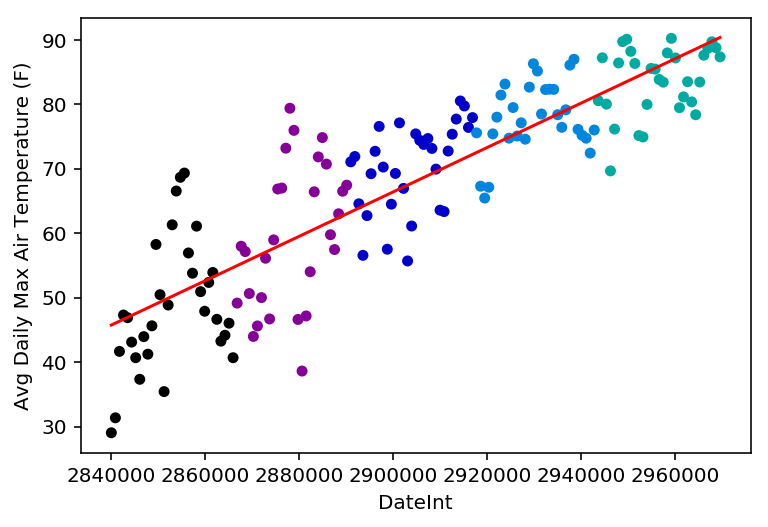

In [20]:
subset.plot.scatter(x='DateInt', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot([min(subset['DateInt'].values), max(subset['DateInt'].values)], [min(Y_pred), max(Y_pred)], color='red')

>9) What are the slope and intercept of your best fit line?

In [21]:
#slope= 0.00034443088958599586
#yintercept= -932.4267269431856


>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [22]:
min(Y_pred)

45.745977692575934

In [23]:
max(Y_pred)

90.38422098292097

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [24]:
secondsubset = df[df['Date']<pd.datetime(2011, 12, 31)]

In [25]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values

In [27]:
Y_pred = lin_reg(X,Y)

3.072410840971274e-07 75.67019246681011


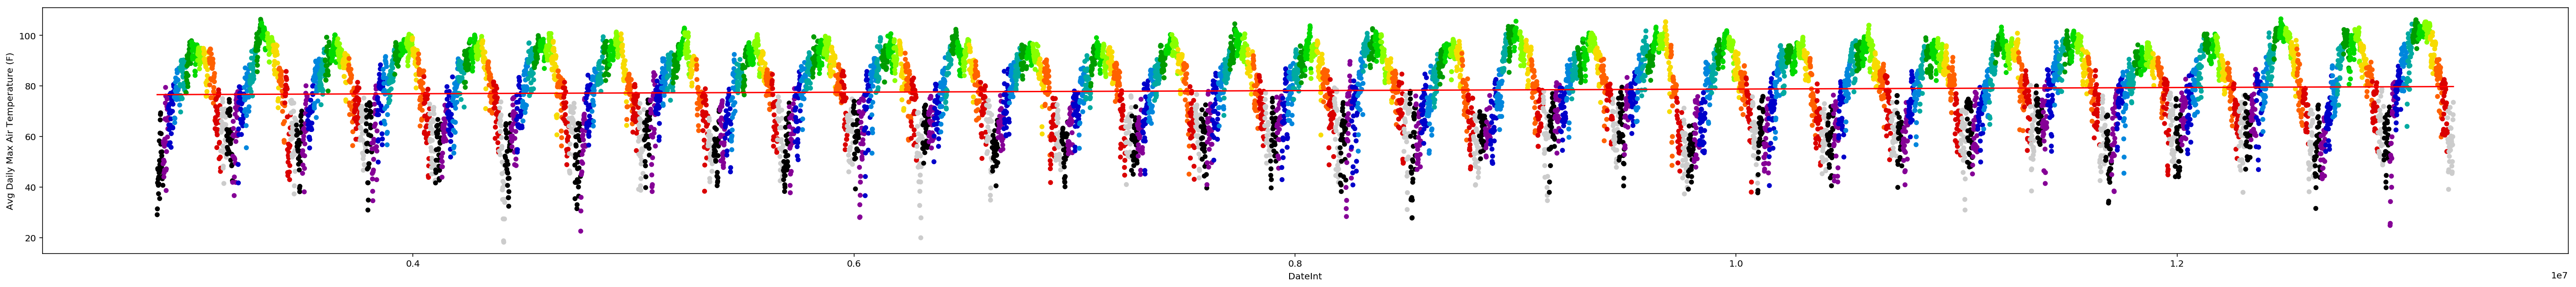

In [31]:
df.plot.scatter(x='DateInt', y='Avg Daily Max Air Temperature (F)',c=df['color'],figsize=(50,5))
plt.plot([min(df['DateInt'].values), max(df['DateInt'].values)], [min(Y_pred), max(Y_pred)], color='red')

>12) Is the slope positive or negative? What do you think that means?

In [ ]:
Positive, there is a positive correlation meaning the temperature is slightly increasing. Possibly due to global warming.